<a href="https://colab.research.google.com/github/happycode-ch/Boston_Housing_Data/blob/main/real_estate_kaggle_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Section

Title: Boston Housing Data

Sources:
(a) Origin: This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University.
(b) Creator: Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.
(c) Date: July 7, 1993

Concerns housing values in suburbs of Boston.

Number of Instances: 506

Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:

CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over
25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds
river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centres
RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks
by town
LSTAT % lower status of the population
MEDV Median value of owner-occupied homes in $1000's

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d arslanali4343/real-estate-dataset

Dataset URL: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset
License(s): other
real-estate-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip real-estate-dataset.zip

Archive:  real-estate-dataset.zip
  inflating: data.csv                


In [23]:
import pandas as pd

real_estate = pd.read_csv('data.csv')

real_estate.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


## Section: 1 - Data Set Check

In [18]:
# sample 10 rows
real_estate.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [22]:
# summary statistics
real_estate.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [24]:
# check missing values
# no nulls found
real_estate.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

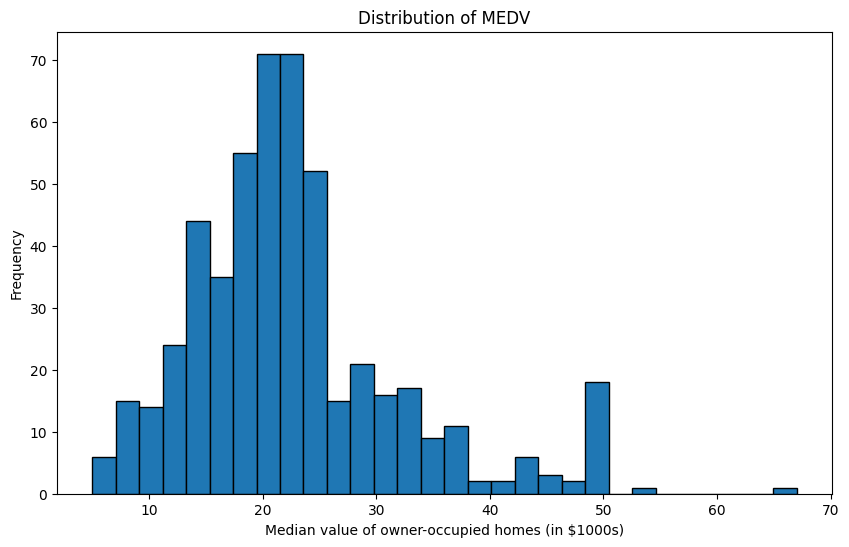

In [25]:
# Visualize: Distribution of the Target Variable (MEDV)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(real_estate['MEDV'], bins=30, edgecolor='k')
plt.xlabel('Median value of owner-occupied homes (in $1000s)')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')
plt.show()

### Distribution of MEDV

The median value of owner-occupied homes (MEDV) reveals a right-skewed distribution. Most homes have a median value between 20,000 USD and 25,000 USD (represented as 20.0 to 25.0 in the dataset). Values range from 5,000 USD to 50,000 USD, with some outliers reaching up to 70,000 USD. The skewness and presence of outliers should be considered in further analysis and modeling.


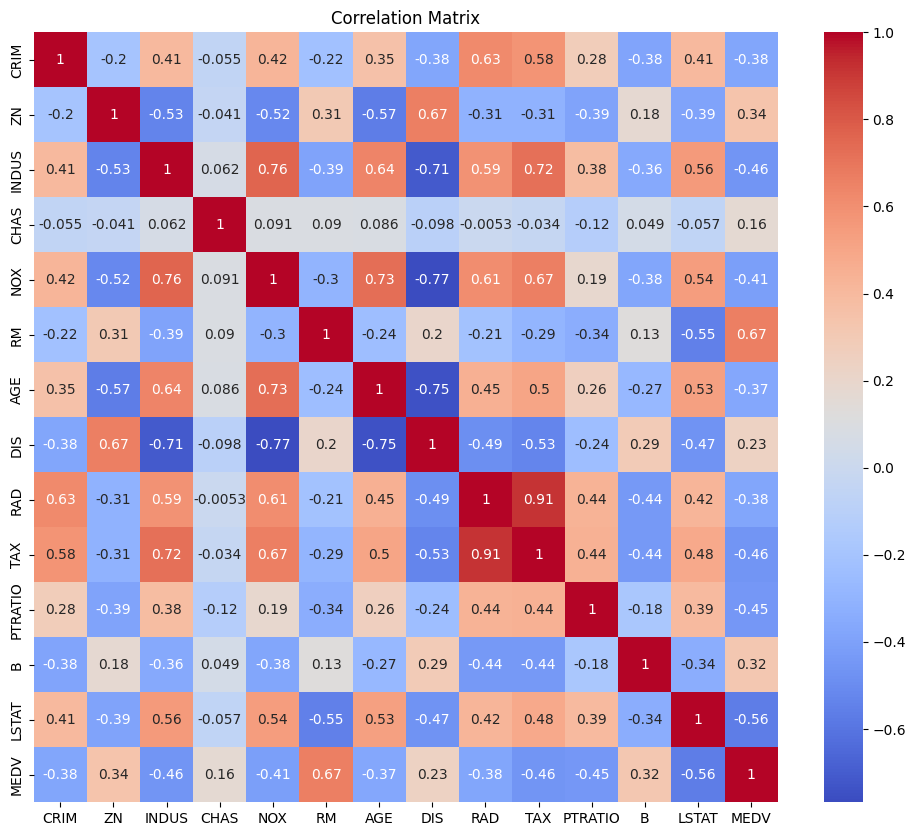

In [26]:
# Correlation Matrix
import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = real_estate.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Correlation Matrix Summary

The correlation matrix for the Boston Housing dataset reveals several important relationships between the features and the target variable, `MEDV` (Median value of owner-occupied homes). Notably, `RM` (average number of rooms per dwelling) exhibits a strong positive correlation with `MEDV` (0.67), indicating that homes with more rooms tend to have higher median values. Conversely, `LSTAT` (percentage of lower-status population) shows a strong negative correlation with `MEDV` (-0.56), suggesting that neighborhoods with a higher proportion of lower-status individuals tend to have lower median home values. Additionally, `PTRATIO` (pupil-teacher ratio by town) is negatively correlated with `MEDV` (-0.51), implying that areas with higher pupil-teacher ratios generally have lower home values.

Other notable findings include moderate negative correlations between `MEDV` and both `TAX` (property tax rate) and `INDUS` (proportion of non-retail business acres per town), each at -0.46. `NOX` (nitric oxides concentration) also shows a moderate negative correlation with `MEDV` (-0.41). The matrix highlights significant feature interrelationships, such as the high
correlation between `RAD` (accessibility to radial highways) and `TAX` (0.91), suggesting that areas with better highway access have higher tax rates. Furthermore, `DIS` (distance to employment centers) is inversely correlated with `RAD` (-0.71) and `INDUS` (-0.65), indicating that proximity to employment centers is associated with lower industrial activity and highway accessibility.

These insights underscore the need to address multicollinearity, as evidenced by the high intercorrelations among features like `INDUS` and `NOX` (0.76), `AGE` and `DIS` (-0.75), and `TAX` and `RAD` (0.91). Understanding these relationships is crucial for effective feature selection and engineering, ultimately enhancing predictive modeling efforts.
